#### Probability Ratio Encoding
1. Probability of Survived based on Cabin--- Categorical Feature
2. Probability of Not Survived---1-pr(Survived)
3. pr(Survived)/pr(Not Survived)
4. Dictonary to map cabin with probability
5. replace with the categorical feature

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('titanic.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [4]:
### Replacing
df['Cabin'].fillna('Missing',inplace=True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [5]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [6]:
df['Cabin']=df['Cabin'].astype(str).str[0]
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [7]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [14]:
prob_df=df.groupby(['Cabin'])['Survived'].mean()

In [22]:
prob_df=pd.DataFrame(prob_df)
# Probability of Survived based on Cabin ---> Categorical Feature
prob_df


,Survived,Died,Probability_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000
F,0.615385,0.384615,1.600000
G,0.500000,0.500000,1.000000
M,0.299854,0.700146,0.428274
T,0.000000,1.000000,0.000000


In [21]:
# probability of not Survived --- minus1 pr(Survived)
prob_df['Died']=1-prob_df['Survived']

In [17]:
prob_df.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [18]:
#pr(Survived)/pr(Not Survived)
prob_df['Probability_ratio']=prob_df['Survived']/prob_df['Died']
prob_df.head()

,Survived,Died,Probability_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [19]:
probability_encoded=prob_df['Probability_ratio'].to_dict()

In [20]:
probability_encoded

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.42827442827442824,
 'T': 0.0}

In [23]:
# Dictonary to map cabin with probability
df['Cabin_encoded']=df['Cabin'].map(probability_encoded)
#replace with the categorical feature
df.head()

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274


In [17]:
df.head(20)

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
5,0,M,0.428274
6,0,E,3.000000
7,0,M,0.428274
8,1,M,0.428274
9,1,M,0.428274


## Transformation of Features

Why Transformation of Features Are Required?

1. Linear Regression---Gradient Descent ----Global Minima
   the main aim is to find out the Slops coefficient parameter requiring Gradient Descent ----Global Minima usually to derive it pretty much quickly or Faster   
2. Algorithms like KNN, K Means, Hierarchical Clustering--- Euclidian Distance --> it will be integer values
    KNN --> It works on Euclidian Distance and tries to find out the nearest point and  then classifies or regression to find out the average
   Unsupervised K means --> concept of Hierarchical Clustering--- Euclidian Distance tries to find out the distance between two points.
   
Q.) whenever the interviewer asked whether transformation, scaling, or standardization is required for every algorithm 
Ans No

Q.) do you require a transformation in the Decision trees, random forest boost, AdaBoost 

Q.) do you require a transformation anssemble technique where specifically used Decision trees
Ans In the ensemble technique internal use Decision tree splitting is happening based on values that don't require min max standard techniques.

Ans Don't require 
    because the Transformation requires time 
 
Every Point has some vectors and Direction

Deep Learning Techniques(Standardization, Scaling) --> yes Transformation is requred
1. ANN---> There is a concept of GLobal Minima, Gradient
2. CNN-->0-255 pixels
3. RNN--> There is a concept of GLobal Minima, Gradient

0-255 pixels

#### Types Of Transformation
1. Normalization And Standardization
2. Scaling to Minimum And Maximum values
3. Scaling To Median And Quantiles
4. Guassian Transformation
   
       Logarithmic Transformation
       Reciprocal Trnasformation
       Square Root Transformation
       Exponential Trnasformation
       Box Cox Transformation

##### Standardization
We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.
z=(x-x_mean)/std

In [25]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()


,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [26]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [27]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [34]:
df

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
888,0,3,28.0,23.4500
889,1,1,26.0,30.0000


In [28]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [39]:
scaler=StandardScaler()
### fit vs fit_transform
## Here We need to transform our data
df_scaled=scaler.fit_transform(df)
## What is the exact difference between fit and fit_transform
## Ans: with respect to the Machine learning algorithm we use only fit to train our data but we use fit_transformation in PCA for ML
## Suppose if you want to perform and change the data/variables that time use fit_transform means data transformation.  

In [36]:
pd.DataFrame(df_scaled)
## Here the transformation feature vise not row vise 
## its transform survived = 0, Age = 1, pclass =2, fare = 3

## StandardScaler calculates the mean and standard deviation for every feature
## and apply Z = (Xi - mean)/std for every data point/ row of that feature 

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

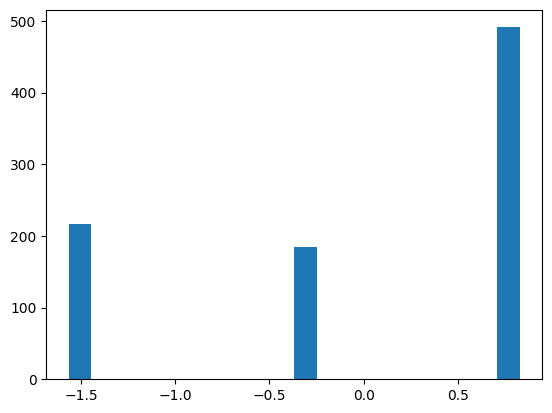

In [42]:
plt.hist(df_scaled[:,1],bins=20) ## 1-->column/index means ---> pclass

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

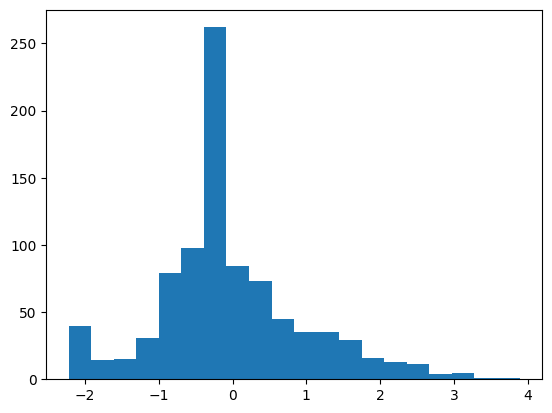

In [46]:
plt.hist(df_scaled[:,2],bins=20) ## Age 
## Age between lies -2 to 4 so its follow gausian Distributin and its missing value present in approx Zero 

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <a list of 20 Patch objects>)

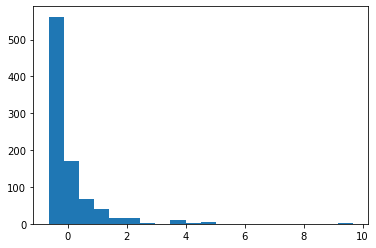

In [14]:
plt.hist(df_scaled[:,3],bins=20) # fare

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

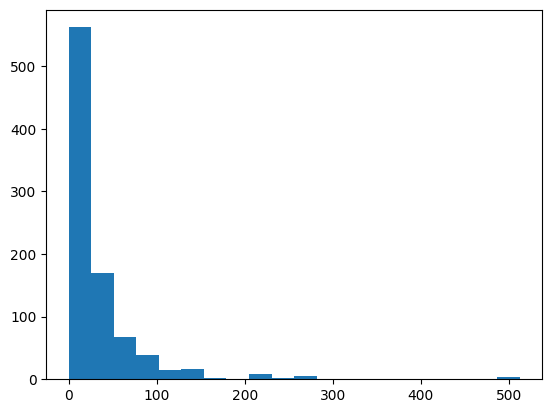

In [47]:
plt.hist(df['Fare'],bins=20) ## this is Outlier not following gaussian Disribution 
## its Right Skewd zero is very high its called outliers

In [49]:
df

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
888,0,3,28.0,23.4500
889,1,1,26.0,30.0000


##### Min Max Scaling  (### CNN)---Deep Learning Techniques
Min Max Scaling scales the values between 0 and 1 / 0 to 1.
X_scaled = (X - X.min ) / (X.max - X.min)

In machine learning also we can use Min Max Scalling but 
Machine learning prefers to use to standard Scalling its find out center median value which is just like a Gaussian distribution, 
But if you have kind of outliers at that time it may be impacted some 

for normal distribution, we can use standard scaling

### Remember: 
if have any problem with Statements or if  you have any data with respect to Standard Normal Distribution you can just use Standard Scaller 
if it is not following that kind of Distribution then you can use Min Max Scaling
But Most probably you have to use Standard Scaller its works pretty muc well most of the Algorithm.



In [48]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

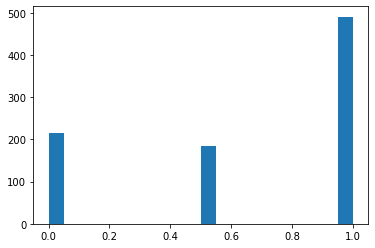

In [18]:
plt.hist(df_minmax['Pclass'],bins=20) # pclass is have Decrit values


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

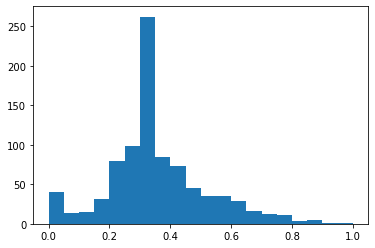

In [19]:
plt.hist(df_minmax['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

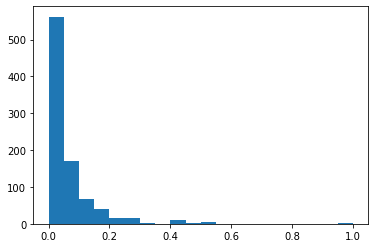

In [20]:
plt.hist(df_minmax['Fare'],bins=20)

##### Robust Scaler
It is used to scale the feature to median and quantiles
Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

### Percentile
#### 0,1,2,3,4,5,6,7,8,9,10

    What is The Quantile of 9 
    9-90 percentile---90% of all values in this group is less than 9
    1-10 precentile---10% of all values in this group is less than 1
    4-40% percentile---40% of all values in this group is less than 4
### Quantile
    q1 = 25/100 * Number of elements
    q2 = 75/100 * Number of elements
### Lower Bound Upper Bound 
    IQR = 75th quantile - 25th quantile
    
    LowerFance = q1 - 1.5(IQR)
    HigherFance = q3 - 1.5(IQR)
    
    X_scaled = (X - X.median) / IQR

    Create a BoxPlot To see the Distribution 

In [21]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <a list of 20 Patch objects>)

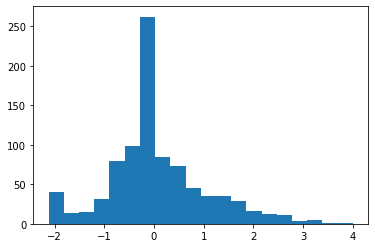

In [23]:
plt.hist(df_robust_scaler['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <a list of 20 Patch objects>)

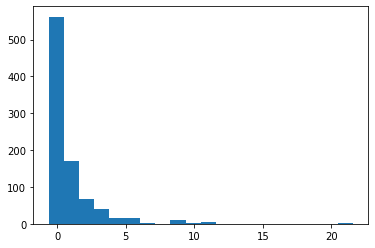

In [24]:
plt.hist(df_robust_scaler['Fare'],bins=20)

#### Convert into Gaussian Distribution and Gaussian Transformation
    Some machine learning algorithms like linear and logistic assume that the features are normally distributed
    -Accuracy
    -Performance
    - logarithmic transformation ---> whenever we have skewed feature we basic apply logarithmic  transformation basically convert this distribution to normal Distribution 
    - reciprocal transformation
    - square root transformation
    - exponential transformation (more general, you can use any exponent)
    - boxcox transformation

#### when we apply Gaussian Distribution
    Q.) can we say Standarization is a kind of Gaussian Distribution ? 
    Ans: No
    Suppose your features are not normally distributed then we can apply some mathematical equation on to convert that into a Normal/Gaussian Distribution for that we use Gaussion transformation 
    Why Gaussian distribution is required because some of the Algorithm's linear, logistic regression works pretty much well when our Data is gaussian Distribution

    Search on Google ---> Which are algorithms requires to Normal Distribution


In [51]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [52]:
### fillnan
df['Age']=df['Age'].fillna(df['Age'].median())

In [53]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [54]:
import scipy.stats as stat
import pylab 

In [59]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1) ## 1 row 2 column and 1st index
    ## Here I Will Plot two types
    ## on the left Distribution on the histogram plot 
    ## on the right Q-Q Plot
    df[feature].hist()
    plt.subplot(1,2,2) ## 1 row 2 column and 2nd index
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    

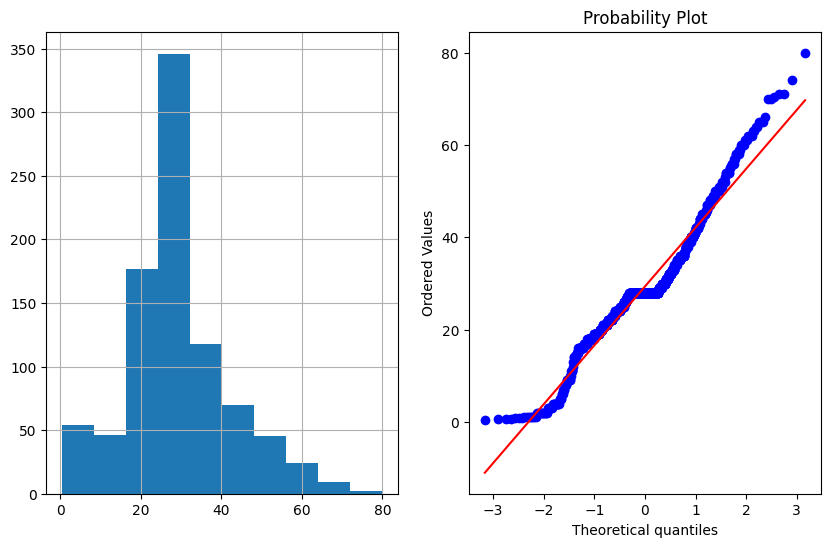

In [56]:
plot_data(df,'Age')

#### Logarithmic Transformation
 whether check above distribution is Normal or not using Logarithmic Transformation  
Remmember Logrithmic is work well When tour data is Skewed left or Right 
In that senario it will convert the data to Normal Destribution 

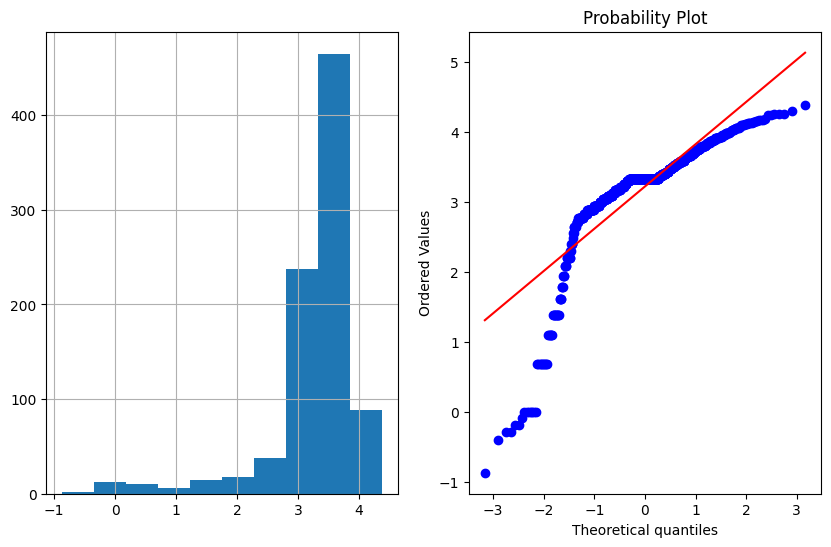

In [61]:
import numpy as np
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

# here the value is log of Age when we use Logrithmic Transformation 
# you can compare the plot with Q-Q plot

After Applying the Logarithmic Transformation there is not following to Straight line
so we can say we can not use the Lograthemic Transformation to make it Gaussian Distribution 

So we use Next technique


#### Reciprocal Trnasformation
Its nothing but Reverse 1/value of feature

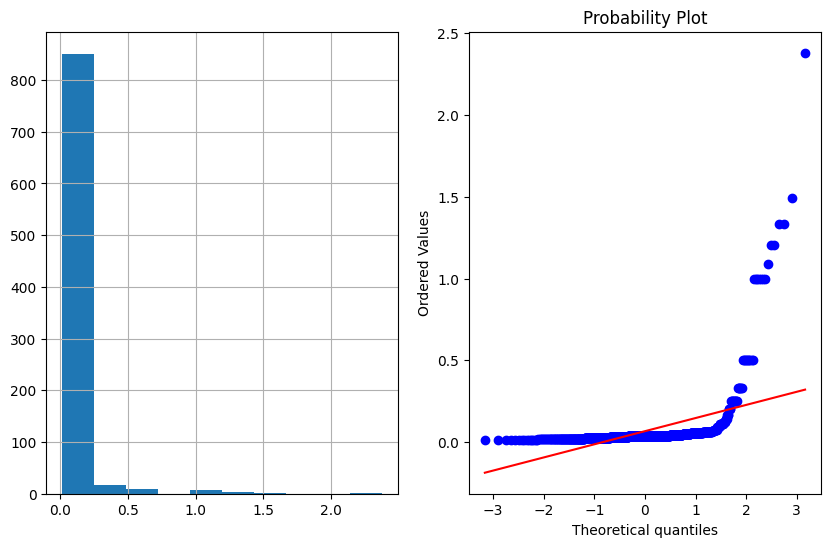

In [62]:
df['Age_reciprocal']=1/df.Age # create new feature
plot_data(df,'Age_reciprocal')

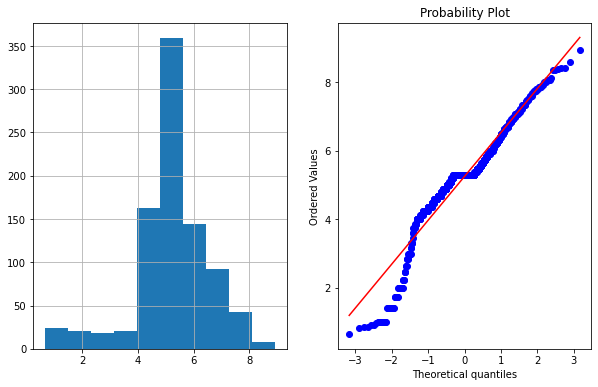

In [43]:
##### Square Root Transformation
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

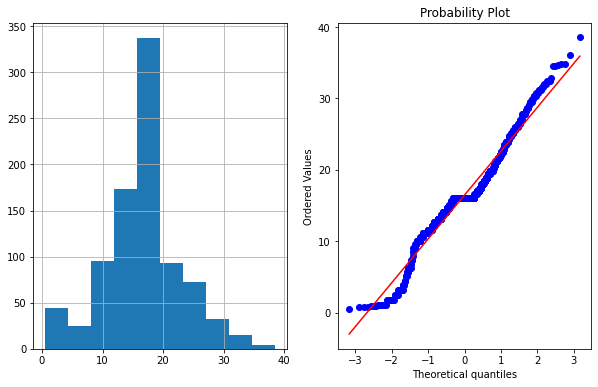

In [44]:
#### Exponential Transformation --> e to the power of 
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

#### BoxCOx Transformation
The Box-Cox transformation is defined as: 

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.

In [46]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])

In [48]:
print(parameters)

0.7964531473656952


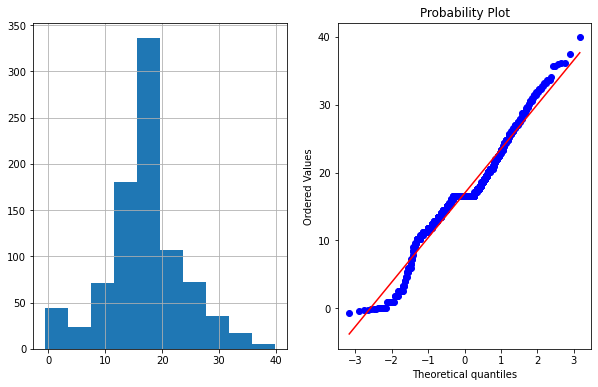

In [49]:
plot_data(df,'Age_Boxcox')

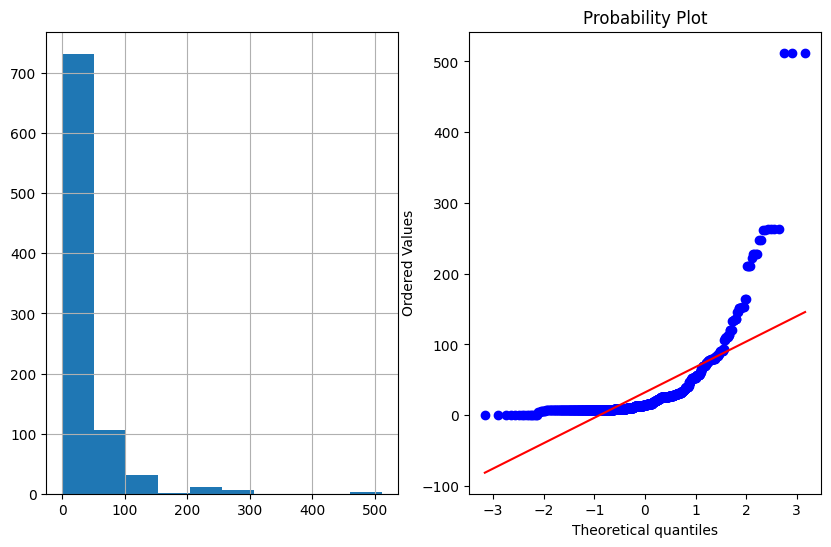

In [64]:
## here My Fare is Right Skewed 
## So we are using Logrithmic Transformation 
plot_data(df,'Fare')

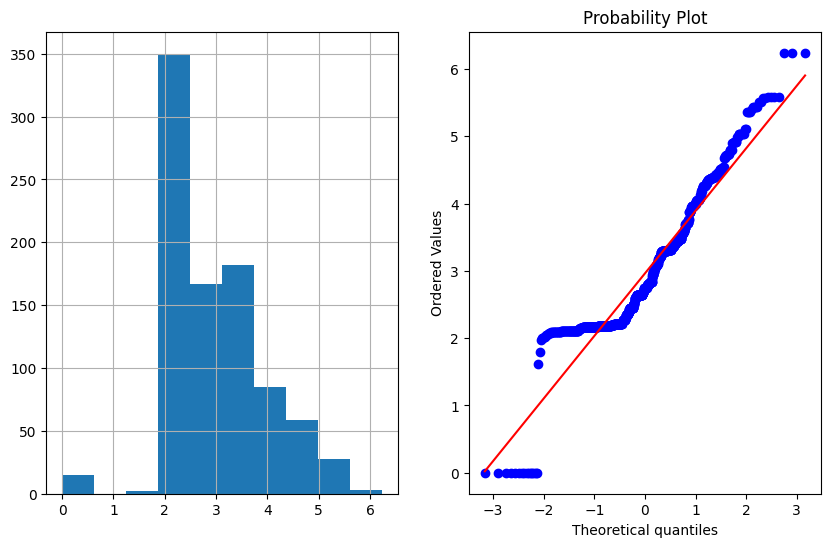

In [67]:
#### In Fare Logrithmic we use  
df['Fare_log']=np.log1p(df['Fare'])
plot_data(df,'Fare_log')
## google to check log1p and log of Logrithmic transformation  

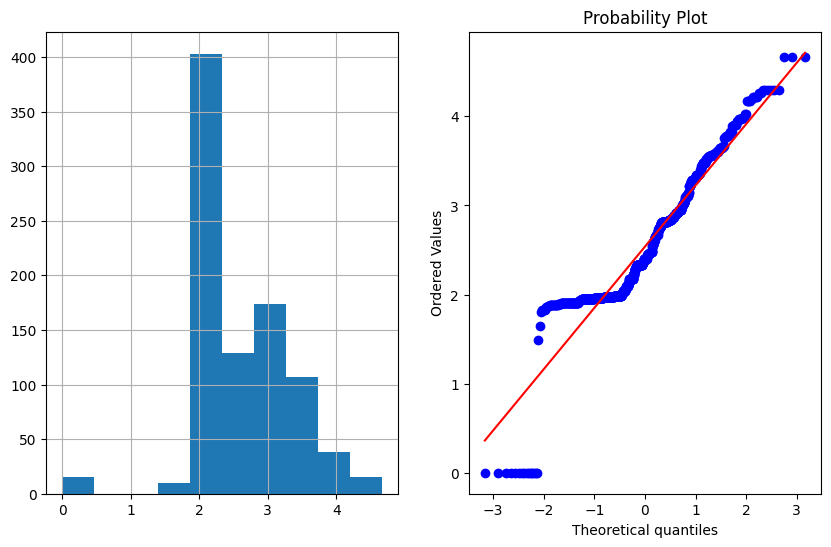

In [66]:
## Appliying Box Cox in fare 
df['Fare_Boxcox'],parameters=stat.boxcox(df['Fare']+1)
plot_data(df,'Fare_Boxcox')